In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import variance, stdev # deprecated, use np.var and np.std
from sklearn.preprocessing import StandardScaler, LabelEncoder # data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # potential alternative scaling
from scipy.stats import zscore, boxcox # outlier treatment
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# chose model
from sklearn.linear_model import LogisticRegression

In [224]:
# Loading the dataset
df =  pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 ## Data Sanity Checks

In [226]:
df.shape

(891, 12)

- > This dataset has 891 rows and 12 Columns

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
# This code checks and displays on numerical columns in this dataset
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [229]:
# This code checks and displays the categorical columns in the dataset
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [230]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- > This dataset has some missing values in Age column and Cabin colum with 687 missing values. Cabin column has a lot of missing values so I have decided to drop the column as trying to fill the values may cause more damage. Also Embarked has some missing values which we can impute.

## Drop Nan values for Cabin and Fillna for Age and Embarked column

In [231]:
df = df.drop(columns=['Cabin'], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## fillna() method

In [232]:
median_age = df['Age'].median()
print(median_age)
df['Age'].fillna(median_age,inplace=True)

28.0


- > We have used median to fill missing values in the age column.

In [233]:
mode_em= df['Embarked'].mode()[0]
print(mode_em)
df['Embarked'].fillna(mode_em,inplace=True)

S


- > We used mode to fill in missing values in the Embarked column

In [234]:
# Checking whether we took care of all the missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


The describe function returns basic statistics computation as shown above, the count, mean, standard deviation,minimum, 25%, 50%, 75% percentiles and the maximum

In [236]:
df.describe(include = 'object')


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


The above cell returns statistical analysis for Categorical columns

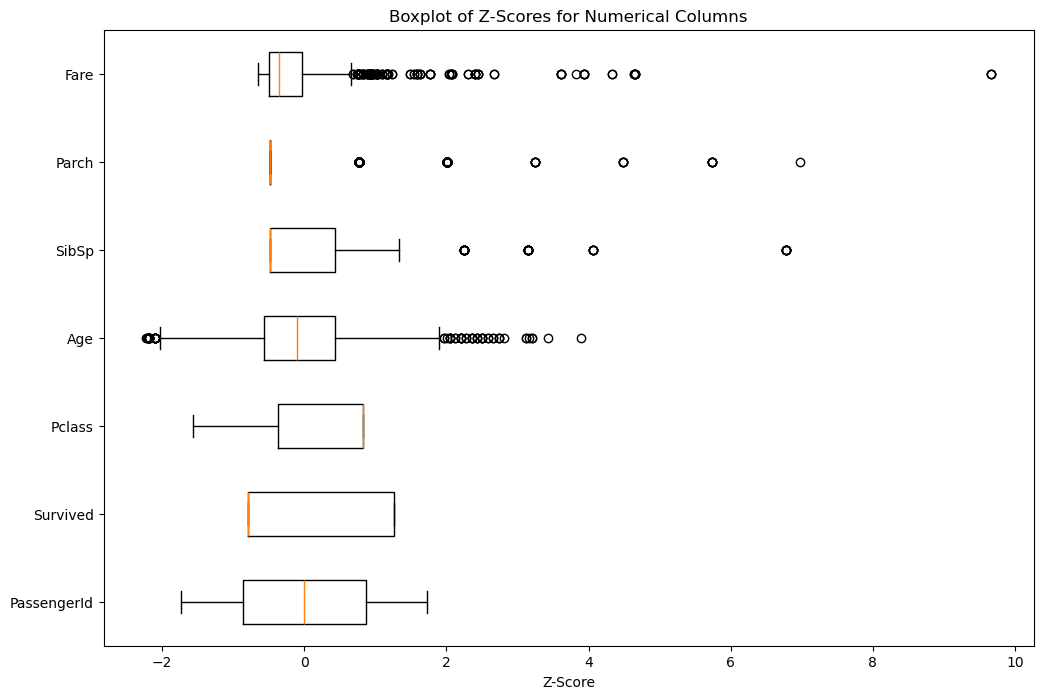

In [237]:
# outlier detection
z_scores = zscore(df[num_cols])

z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_df.values, labels=num_cols, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [238]:
# Define a function to remove outliers using Box-Cox transformation
def remove_outliers_boxcox(data):
    # Added a small constant to handle zero and negative values--close to one
    data = data - data.min() + 1e-6
    transformed_data, _ = boxcox(data)
    return transformed_data

# Apply Box-Cox transformation to numerical columns
transformed_num_cols = df[num_cols].apply(remove_outliers_boxcox)
transformed_num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.457501e+00,-3.092855e+01,7.572395e-01,12.787425,9.999994e-07,-150.489624,2.516984
1,9.999998e-07,9.999994e-07,-3.852710e+00,20.401656,9.999994e-07,-150.489624,7.303128
2,8.875065e-01,9.999994e-07,7.572395e-01,14.782364,-5.529558e+01,-150.489624,2.659645
3,1.639613e+00,9.999994e-07,-3.852710e+00,19.039573,9.999994e-07,-150.489624,6.534568
4,2.315393e+00,-3.092855e+01,7.572395e-01,19.039573,-5.529558e+01,-150.489624,2.685032
...,...,...,...,...,...,...,...
886,1.519119e+02,-3.092855e+01,9.999996e-07,15.270003,-5.529558e+01,-150.489624,3.509042
887,1.520306e+02,9.999994e-07,-3.852710e+00,11.237442,-5.529558e+01,-150.489624,5.186493
888,1.521493e+02,-3.092855e+01,7.572395e-01,15.753617,9.999994e-07,0.632178,4.658017
889,1.522680e+02,9.999994e-07,-3.852710e+00,14.782364,-5.529558e+01,-150.489624,5.186493


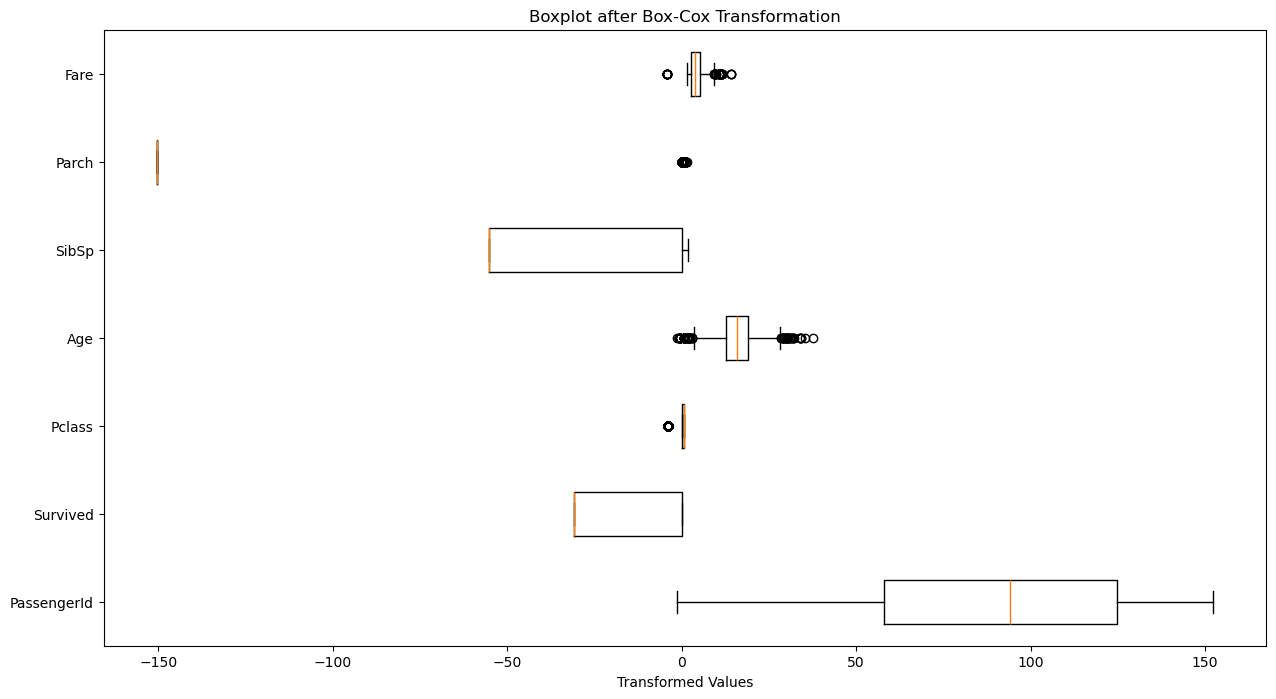

In [239]:
# Plot boxplots of the transformed columns
plt.figure(figsize=(15, 8))
plt.boxplot(transformed_num_cols.values, labels=num_cols, vert=False)
plt.title('Boxplot after Box-Cox Transformation')
plt.xlabel('Transformed Values')
plt.show()

## Exploratory Data Analysis

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Text(0.5, 0, 'Embarked')

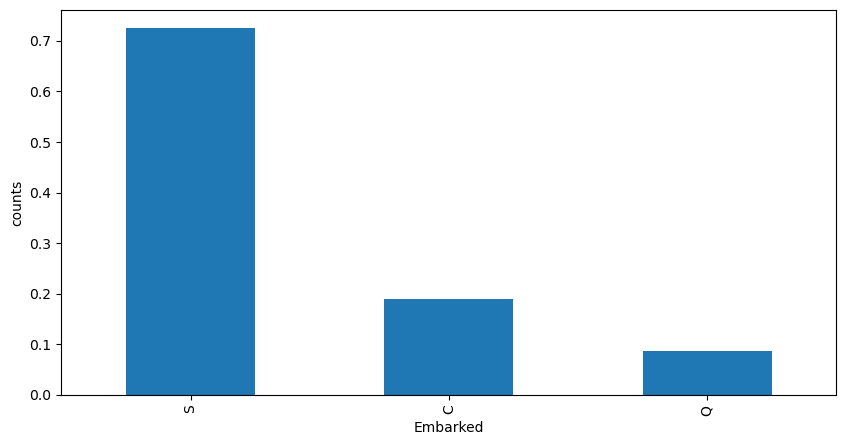

In [240]:
print(df['Embarked'].value_counts())
plt.figure(figsize=(10,5))
df['Embarked'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Embarked')


Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64


Text(0.5, 0, 'Age')

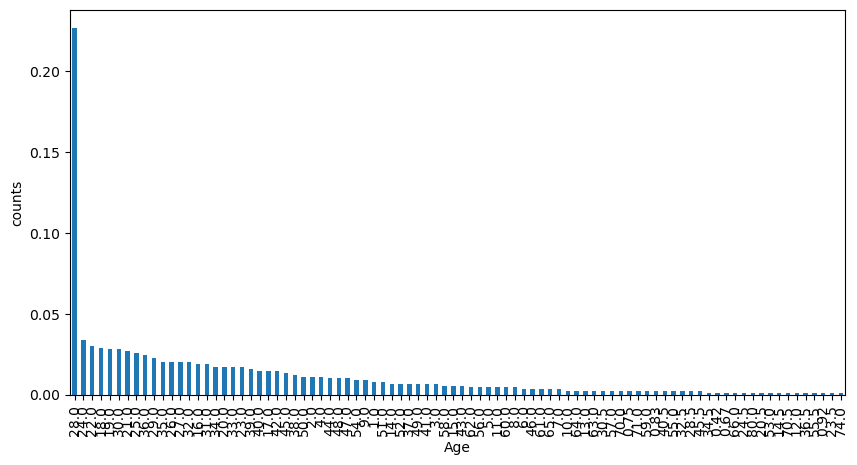

In [241]:
print(df['Age'].value_counts())
plt.figure(figsize=(10,5))
df['Age'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Age')

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Text(0.5, 0, 'Parch')

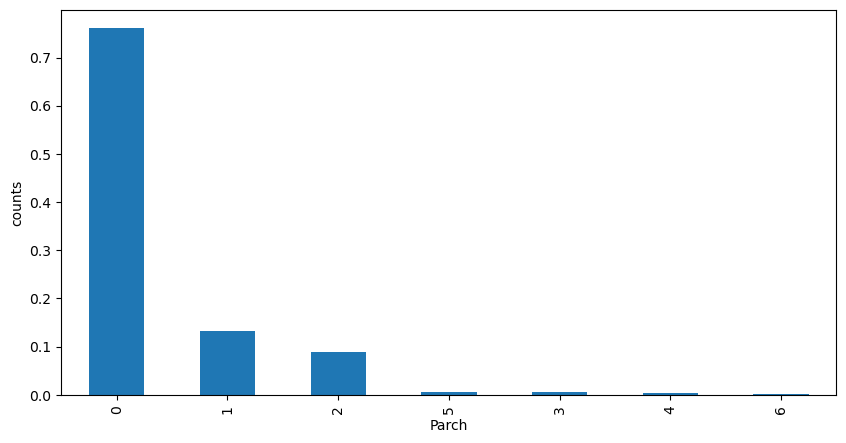

In [242]:
print(df['Parch'].value_counts())
plt.figure(figsize=(10,5))
df['Parch'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Parch')

Sex
male      577
female    314
Name: count, dtype: int64


Text(0.5, 0, 'Sex')

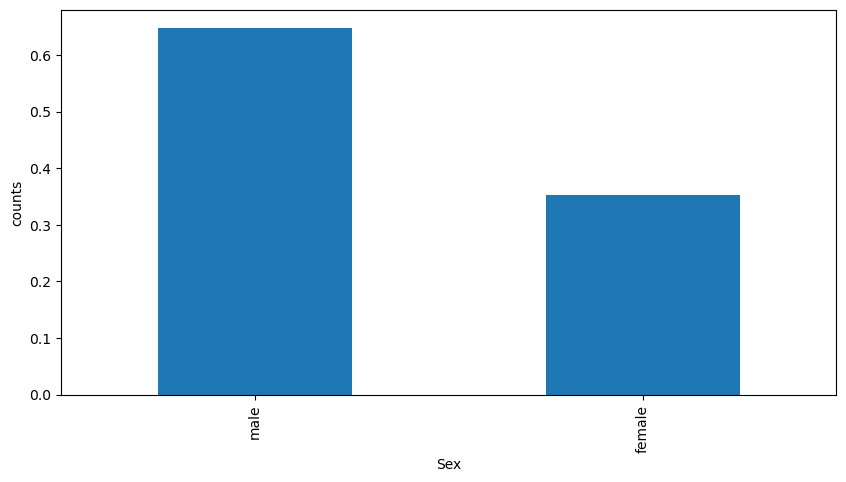

In [243]:
print(df['Sex'].value_counts())
plt.figure(figsize=(10,5))
df['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Sex')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Text(0.5, 0, 'Sibsp')

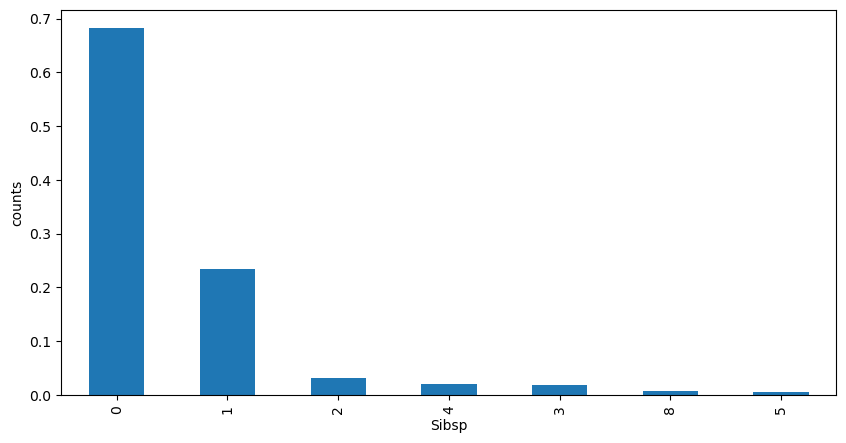

In [244]:
print(df['SibSp'].value_counts())
plt.figure(figsize=(10,5))
df['SibSp'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Sibsp')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Text(0.5, 0, 'Pclass')

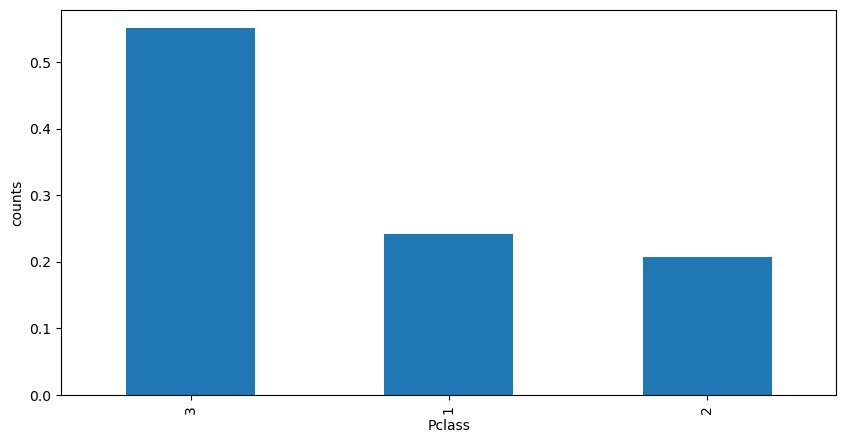

In [245]:
print(df['Pclass'].value_counts())
plt.figure(figsize=(10,5))
df['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Pclass')

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


Text(0.5, 0, 'Ticket')

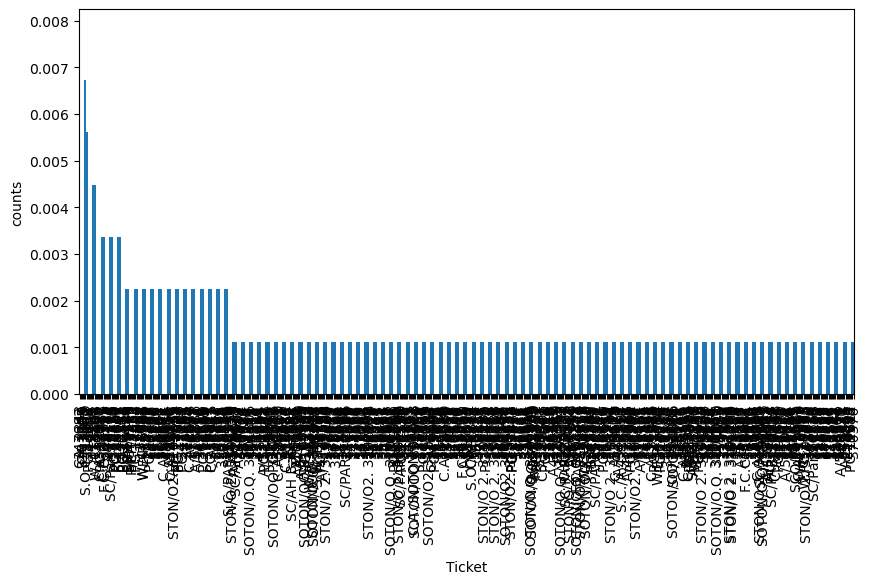

In [246]:
print(df['Ticket'].value_counts())
plt.figure(figsize=(10,5))
df['Ticket'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Ticket')

Survived
0    549
1    342
Name: count, dtype: int64


Text(0.5, 0, 'Survived')

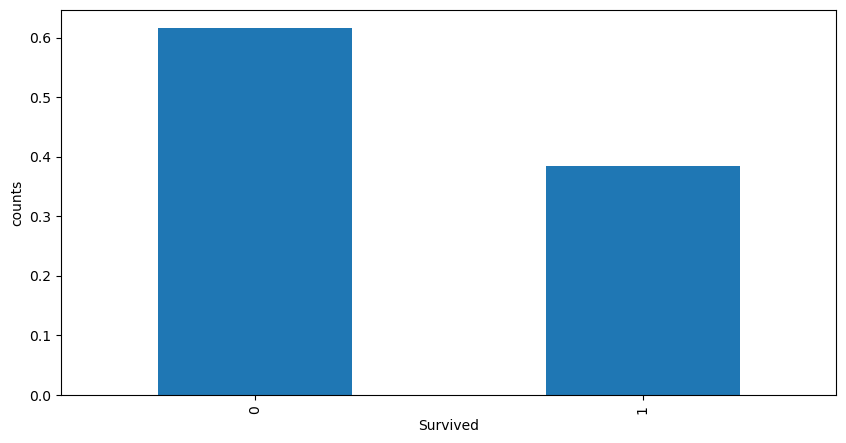

In [247]:
print(df['Survived'].value_counts())
plt.figure(figsize=(10,5))
df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Survived')

<Axes: xlabel='Survived', ylabel='Density'>

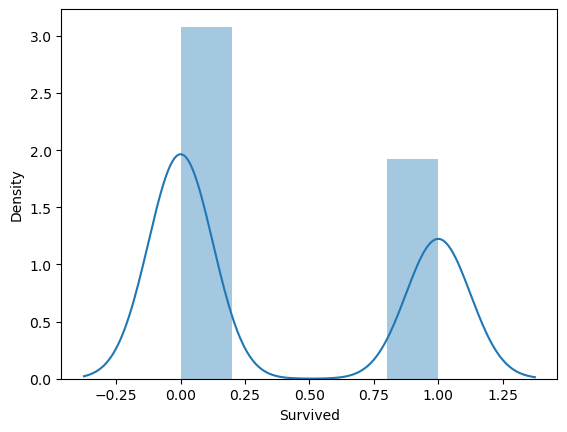

In [248]:
sns.distplot(df['Survived'])

The Survived column is our target variable. We visualize and analyse here that this is a classification problem.

In [249]:
df.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

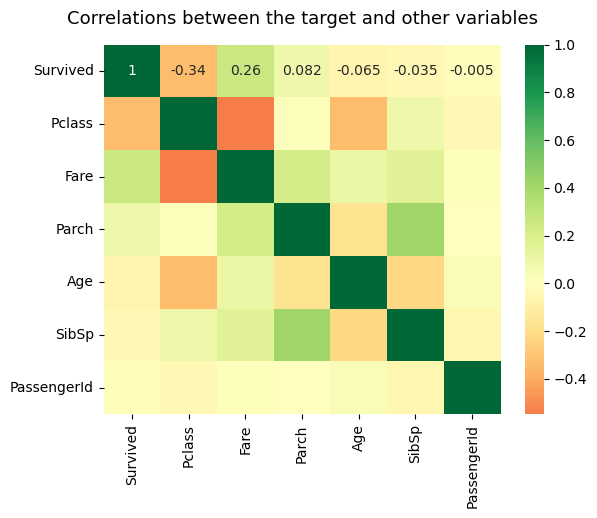

In [250]:
num_df = df.select_dtypes(include=['number'])

top10_corrs = abs(num_df.corr()['Survived']).sort_values(ascending = False).head(10)
corr = num_df[list(top10_corrs.index)].corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 13})
plt.show()

### One Hot Encoding

In [251]:
dummies = pd.get_dummies(df['Embarked'],drop_first=True).astype(int)
dummies

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [252]:

df.drop(['Embarked'],axis = 1, inplace = True)

In [253]:
df = pd.concat([df,dummies],axis = 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,0


## Label encoding


In [254]:
label_encoder = LabelEncoder()

ordinal_cols = ['Name','Sex','Ticket']
# Encode ordinal columns
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [255]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,108,1,22.0,1,0,523,7.2500,0,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,0,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,0,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,0,1


In [256]:
#Seperating dependents and independent variables
X = df.drop(['Survived'], axis = 1)
y = df.pop('Survived') 

In [257]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [259]:
# extract feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort features and importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

In [260]:
# Print the top 10 most important features
print("Top 10 most important features:")
for i, (feature, importance) in enumerate(zip(sorted_features[:10], sorted_importances[:10])):
    print(f"{i+1}. {feature}: {importance:.4f}")

Top 10 most important features:
1. Sex: 0.2396
2. Ticket: 0.1516
3. Fare: 0.1277
4. Name: 0.1179
5. PassengerId: 0.1167
6. Age: 0.1058
7. Pclass: 0.0655
8. SibSp: 0.0270
9. Parch: 0.0248
10. S: 0.0163


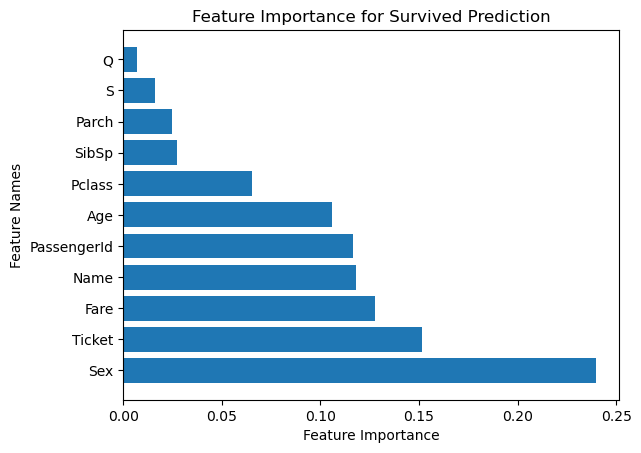

In [279]:
# Visualization 
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance for Survived Prediction")
plt.show()

In [262]:
# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 11), (712,), (179, 11), (179,))

In [273]:
# Define a stratified splitter
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
sss

StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None)

In [274]:
# Function to train and evaluate models
def train_and_evaluate_model(model_name, model):
    print(f"\n**Evaluating {model_name} Model:**")
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"- Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"- F1 Score: {f1_score(y_test, y_pred):.4f}")
        print(f"- Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"- Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"- Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
        print(f"- ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}\n")

In [278]:
# Experiment with RandomForestClassifier model
train_and_evaluate_model("RandomForestClassifier", RandomForestClassifier())


**Evaluating RandomForestClassifier Model:**
- Accuracy: 0.8268
- F1 Score: 0.7559
- Precision: 0.8276
- Recall: 0.6957
- Confusion Matrix:
 [[100  10]
 [ 21  48]]
- ROC AUC Score: 0.8024

- Accuracy: 0.7933
- F1 Score: 0.7132
- Precision: 0.7667
- Recall: 0.6667
- Confusion Matrix:
 [[96 14]
 [23 46]]
- ROC AUC Score: 0.7697

- Accuracy: 0.8045
- F1 Score: 0.7287
- Precision: 0.7833
- Recall: 0.6812
- Confusion Matrix:
 [[97 13]
 [22 47]]
- ROC AUC Score: 0.7815

- Accuracy: 0.8547
- F1 Score: 0.7937
- Precision: 0.8772
- Recall: 0.7246
- Confusion Matrix:
 [[103   7]
 [ 19  50]]
- ROC AUC Score: 0.8305

- Accuracy: 0.8156
- F1 Score: 0.7227
- Precision: 0.8600
- Recall: 0.6232
- Confusion Matrix:
 [[103   7]
 [ 26  43]]
- ROC AUC Score: 0.7798

